# Libraries

In [68]:
# plot the graphs inline
%matplotlib inline

In [70]:
import os
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

# Introduction

This week we are going to work with some text data. In this folder, you should a text file called 'fullpapers.txt'. This file was generated by converting the proceedings of the EDM (Educational Data Mining) conference of 2018. You can find the proceedings here: http://educationaldatamining.org/EDM2017/proc_files/fullpapers.pdf
We are going to explore the different terms that are used by authors of the papers in this conference, which will require some data cleaning!

# Import the data

Our goal is compare the different papers in terms of the vocabulary used. 
* open the pdf of the proceedings (fullpapers.pdf); 
* open the txt of the proceedigs (fullpapers.txt)

1) we want to split the data into different papers. Brainstorm a few ideas on how to do that:
* use 'Proceedings of the 10th International Conference on Educational Data Mining"
* 

In [71]:
# 2) First we are going to read the fullpapers.txt file 
# and assign its content to a variable called "data"
# hint: https://stackoverflow.com/questions/3758147/easiest-way-to-read-write-a-files-content-in-python

data = None 
with open('./fullpapers.txt', encoding='utf8') as f:
    data = f.read()

data[:200]

'\x0cZone out no more: Mitigating mind wandering during\ncomputerized reading\nSidney K. D’Mello, Caitlin Mills, Robert Bixler, & Nigel Bosch\nUniversity of Notre Dame\n118 Haggar Hall\nNotre Dame, IN 46556, U'

In [72]:
# 3) To facilitate data processing, we want to split this file
# into different pages. Create a list called "pages" that 
# stores the text presented on each page of the pdf

pages = data.split('Proceedings of the 10th International Conference on Educational Data Mining')



In [73]:
# 4) because we don't want to deal with upper case / lower case issues
# we are going to lower case everything:
pages = [x.lower() for x in pages]

5) Now we would like to join pages if they below to the same paper. Can you think of keywords we could like for to decided if the current page is starting a new paper? Write down two ideas:
1. idea
2. idea

In [74]:
# 6) create a new list called "papers", which is going to contain 
# all the papers we have. Iterate through all the pages and 
# add a new element to the list when you have a full paper

pages = data.split('Proceedings of the 10th International Conference on Educational Data Mining')
pages = [x.lower() for x in pages]

papers = []
current_paper = ''

for page in pages:
    if 'introduction' in page and 'abstract' in page:
        
        papers.append(current_paper)
        current_paper = ''
        current_paper = current_paper + page
        
    else:
            
        current_paper = current_paper + page
        
        

# iterate through the pages and add each paper to the list "papers"

In [75]:
# 7) print how many files you have in the "papers" list:
del papers[0]
len(papers)

17

In [76]:
# 8) print the content of the first two paper to make sure it worked
# (only print the first 300 characters)

print("----First paper ---\n", papers[0][:300])
print("----Second paper ---\n", papers[1][:300])

----First paper ---
 zone out no more: mitigating mind wandering during
computerized reading
sidney k. d’mello, caitlin mills, robert bixler, & nigel bosch
university of notre dame
118 haggar hall
notre dame, in 46556, usa
sdmello@nd.edu

abstract
mind wandering, defined as shifts in attention from task-related
process
----Second paper ---
 

15

measuring similarity of educational items using data on
learners’ performance
jiří řihák

faculty of informatics
masaryk university
brno, czech republic

thran@mail.muni.cz
abstract
educational systems typically contain a large pool of items
(questions, problems). using data mining techniqu


In [115]:
# 9) create a new folder called papers; this is where we are 
# going to save each paper into a separate text file
# hint: google "how to create a new folder with python"

import os
os.mkdir("Papers")


In [126]:
# 10) save each paper into its unique file in the "Papers" folder
# we created above
# Hint: "enumerate" can provide you with the index of the paper in the list
# Feel free to use the following filename for the first paper in the list:
# ./Papers/paper0.txt on mac and .\Papers\paper0.txt on window

pages = data.split('Proceedings of the 10th International Conference on Educational Data Mining')
pages = [x.lower() for x in pages]

papers = []
current_paper = ''

for page in pages:
    if 'introduction' in page and 'abstract' in page:
        
        papers.append(current_paper)
        current_paper = ''
        current_paper = current_paper + page
        
    else:
            
        current_paper = current_paper + page
        
del papers[0]

for i,paper in enumerate(papers):
    output = open(".\Papers\paper" + str(i) + ".txt","w", encoding="utf-8") 
    output.write(papers[i])
    output.close()





   

    








You might be asking yourself why we need to save the data into text files (instead of just using the list of papers above). One answer is that when we work with large datastsets, it's useful to save snapshots of our data that is "clean". This way we don't have to re-run all the code above and we save time. It also allows us to share data between different notebooks for other types of analysis!

# Count frequencies

In [169]:
# 11) We are going to practice your "glob" skills - find all the 
# text files in the "Papers" folder with a glob command!

import glob 

glob.glob(r'C:\Users\Jazib Zahir\Documents\GitHub\S435-Week4-CleaningData\week4-data-cleaning-jzahir\Papers\*.txt')


['C:\\Users\\Jazib Zahir\\Documents\\GitHub\\S435-Week4-CleaningData\\week4-data-cleaning-jzahir\\Papers\\paper0.txt',
 'C:\\Users\\Jazib Zahir\\Documents\\GitHub\\S435-Week4-CleaningData\\week4-data-cleaning-jzahir\\Papers\\paper1.txt',
 'C:\\Users\\Jazib Zahir\\Documents\\GitHub\\S435-Week4-CleaningData\\week4-data-cleaning-jzahir\\Papers\\paper10.txt',
 'C:\\Users\\Jazib Zahir\\Documents\\GitHub\\S435-Week4-CleaningData\\week4-data-cleaning-jzahir\\Papers\\paper11.txt',
 'C:\\Users\\Jazib Zahir\\Documents\\GitHub\\S435-Week4-CleaningData\\week4-data-cleaning-jzahir\\Papers\\paper12.txt',
 'C:\\Users\\Jazib Zahir\\Documents\\GitHub\\S435-Week4-CleaningData\\week4-data-cleaning-jzahir\\Papers\\paper13.txt',
 'C:\\Users\\Jazib Zahir\\Documents\\GitHub\\S435-Week4-CleaningData\\week4-data-cleaning-jzahir\\Papers\\paper14.txt',
 'C:\\Users\\Jazib Zahir\\Documents\\GitHub\\S435-Week4-CleaningData\\week4-data-cleaning-jzahir\\Papers\\paper15.txt',
 'C:\\Users\\Jazib Zahir\\Documents\\GitHu

In [211]:
# 12) iterate through each of the text files and read their contents in the variable below:
text_list = []
import os

path = r'C:\Users\Jazib Zahir\Documents\GitHub\S435-Week4-CleaningData\week4-data-cleaning-jzahir\Papers'

for filename in os.listdir(path):
 f = open(os.path.join(path,filename), encoding="utf8")
 lines = f.read()
 text_list.append(lines) 
 
print(len(text_list))

   


17


In [214]:
# 13) Now we are going to compute the frequency of each word across all 
# documents. Feel free to use the link below to help you!
# hint: https://www.datacamp.com/community/tutorials/absolute-weighted-word-frequency
# (look at the first block of code in the article)

from collections import defaultdict
import pandas as pd

word_freq = defaultdict(int)

for text in text_list:
    for word in text.split():
        word_freq[word] += 1

pd.DataFrame.from_dict(word_freq, orient='index') \
.sort_values(0, ascending=False) \
.rename(columns={0: 'abs_freq'})



,abs_freq
the,5663
of,3402
and,2704
to,2406
a,2028
in,2026
for,1390
that,1052
on,1049
we,1026


In [220]:
# 14) If you haven't done so already, create a dataframe from the dictionary
# and print the head of the dataframe

df = pd.DataFrame.from_dict(word_freq, orient='index') \
.sort_values(0, ascending=False) \
.rename(columns={0: 'abs_freq'})

df.head()




,abs_freq
the,5663
of,3402
and,2704
to,2406
a,2028


What's a problem with the dataframe above? Is there data meaningful?  The most common words are not significant in terms of meaning

In [234]:
# 15) We are going to remove the following stop words, so that we see more interesting 
# keywors. Feel free to use the list and hint below to help you:
# hint: https://stackoverflow.com/questions/43716402/remove-row-index-dataframe-pandas
STOPWORDS = ['a','able','about','across','after','all','almost','also','am','among',
             'an','and','any','are','as','at','be','because','been','but','by','can',
             'cannot','could','dear','did','do','does','either','else','ever','every',
             'for','from','get','got','had','has','have','he','her','hers','him','his',
             'how','however','i','if','in','into','is','it','its','just','least','let',
             'like','likely','may','me','might','most','must','my','neither','no','nor',
           'not','of','off','often','on','only','or','other','our','own','rather','said',
             'say','says','she','should','since','so','some','than','that','the','their',
             'them','then','there','these','they','this','tis','to','too','twas','us',
             'wants','was','we','were','what','when','where','which','while','who',
             'whom','why','will','with','would','yet','you','your']

STOPWORDS1 = ['a','able','about','across','after','all','almost','also','am','among',
             'an','and','any','are','as','at','be','because','been','but','by','can',
             'cannot','could','did','do','does','either','else','ever','every',
             'for','from','get','got','had','has','have','he','her','him','his',
             'how','however','i','if','in','into','is','it','its','just','least','let',
             'like','likely','may','me','might','most','must','neither','no','nor',
           'not','of','off','often','on','only','or','other','our','own','rather',
             'say','she','should','since','so','some','than','that','the','their',
             'them','then','there','these','they','this','to','too','us',
             'was','we','were','what','when','where','which','while','who',
             'whom','why','will','with','would','yet','you','your']


df1 = df.drop(STOPWORDS1)





In [271]:
# 16) print the top 20 words of your new dataframe:

df1.head(20)

,level_0,index,abs_freq
0,0,learning,638
1,1,data,512
2,2,students,421
3,3,student,407
4,4,=,393
5,5,each,350
6,6,model,345
7,7,more,310
8,8,using,278
9,9,used,258


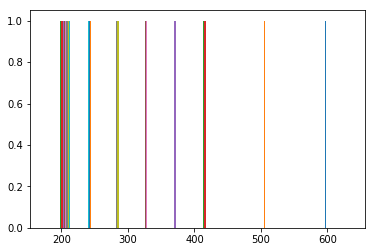

In [240]:
# 17 plot the top 20 results above as a histogram: 

import matplotlib.pyplot as plt
plt.hist(df1.head(20))
plt.show()


What can you tell from this historgram? What do EDM researchers seem to care about?

What are improvements you could add to our data cleaning process? Write at least three things:

# Count word frequencies per paper

While the previous section gave us an overall description of the word frequency for all the papers, it would be interesting to look at each individual paper. This is what we are going to do below, by focusing on the top 30 terms used.

In [279]:
# 18) save the top 30 words from the dataframe above 
# in a new variable called "top_words"

top_words = df1["index"].values

top_words = top_words[:30]










In [312]:
# 19) We are now going to construct a new dataframe where each row is a paper, 
# each column is one of the top 30 words used and each cell is a count of this word. 
# NOTE: make sure you add another field called "text" where you're going to store the 
# actual text of the paper. 
# Hint: build a list of dataframes (one for each papers), 
# and use the concat function from pandas to concatenate them!
d = []

for text in text_list:
    dic = {}
    dic['text'] = text
    # iterate through the top words, add counts to the dictionary
    # and append the results to the list above (d)
    for words in top_words:    
        count = 0
        for words in text.split():
             count += 1
        dic[words] = count 
    df = pd.DataFrame.from_dict(dic, orient='index')
    d.append(df)




          

        

# concatenate the list d into a dataframe

dataframe = pd.concat(d)

dataframe.head(30)



,0
text,zone out no more: mitigating mind wandering d...
york.,7418
text,\n\n15\n\n measuring similarity of educational...
2008.,6491
text,\n\n87\n\n generalizability of face-based mind...


In [313]:
# 20) create a scatter plot of the words 'learning' and 'data'
# what can you say from it?

plt.scatter(dataframe['learning'],dataframe['data'])
plt.show()


KeyError: 'learning'

In [50]:
# 21) annotate each point with the index number of the dataframe
# hint: https://www.pythonmembers.club/2018/05/08/matplotlib-scatter-plot-annotate-set-text-at-label-each-point/



In [51]:
# 22) what are the two extreme papers, 
# i.e., papers with more occurences for each term on each axis?



In [52]:
# 23) plot the histogram of the paper that had high counts of "data"
# hint: https://stackoverflow.com/questions/52392728/create-a-histogram-based-on-one-row-of-a-dataframe



In [53]:
# 24) plot the histogram of the paper that had high counts of "learning"


In [54]:
# 25) what can you observe? 


In [55]:
# 26) print the first 1000 characters of each paper. 


# Is your interpretation confirmed?


# Regex

In this section we are going to work with Regex formulas to extract part of the paper. 

In [56]:
# 27) we are going to work on the first paper to make sure that our 
# regex works. Just retrieve the text and assign it to a variable below


In [57]:
# 28) find the text between the words 'abstract' and 
# 'introduction' for the first paper using a regex
# https://stackoverflow.com/questions/12736074/regex-matching-between-two-strings/12736203



In [58]:
# 29) find the text between the words 'abstract' and 
# 'introduction' for the first paper using the .index() function


In [59]:
# 30) add a new column namd "abstract" to the dataframe above 
# and initialize it with an empty string


In [60]:
# now add the abstracts to each row of the dataframe using either
# of the two methods above
# Hint: https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas



In [61]:
# 31) print your abstracts (they should contain a lot of \n = carriage return)


In [62]:
# 32) clean the abstract column using the "apply" function with a lambda



## Comparing documents using TF-IDF

In [63]:
# 33) now we are going to do something a little more advanced:'
# we are going to compute the similarity between two texts
# using a method called tf-idf (we'll talk more about it later)
# Hint: https://stackoverflow.com/questions/43631533/similarity-between-two-text-documents-in-python
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer


34) What can you observe?

In [64]:
# 35) repeat the same procedure with the entire papers


In [65]:
# 36) What are two documents that seem to be very similar?
# print their abstract: 
# print the first 1000 characters of each paper. 


In [66]:
# 37) what seems to be similar between them? 

# they both talk about analyzing questions and answers from students

## Free exploration (Optional)

- try to extract the names of the author
- find a way to get the top words shared across two texts
- use a regex (or any other method) to get the list of references